## Using accept-reject and a standard normal proposal, obtain samples from a truncated standard normal distribution with pdf:
                
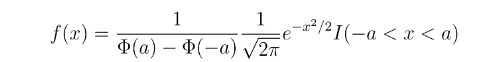
where Φ(·) is the CDF of a standard normal distribution. Run for a=4 and a=1. 
What are the differences between the two settings?


In [1]:
using Plots
import Statistics

In [2]:
function Standard_Normal(x)
    return exp((-(x^2)/2))/(2*pi)^0.5
end    

Standard_Normal (generic function with 1 method)

In [3]:
# Target distribution range is (-a,a) ; else constant c will be zero.......
function RV_generator()
    
    a = 1
    # Writing ratio = sup(f(x)/g(x))
    ratio = 1/(Standard_Normal(a)- Standard_Normal(-a))
    count =0 
    accept  = 0
    array =[]
    while(accept==0)
        count +=1
        U= rand()
        if (U<ratio) 
            accept =1
            push!(array,U)
            push!(array,count)
            return array
        end
    end    
 end         

RV_generator (generic function with 1 method)

In [29]:
Sample_size  = 1e3
Sample_array = []
result =[]
Count = []
for  i in 1:Sample_size
        result = RV_generator()
        push!(Sample_array,result[1])
        push!(Count,result[2])
end  
println(Sample_array)


Any[0.3005657376811999, 0.1800647502837951, 0.28427547442783485, 0.4975718187491083, 0.8404481434790568, 0.16092443511178678, 0.8326429436087575, 0.6979798616166716, 0.3548556539266935, 0.9297339634260237, 0.9419369659940268, 0.9717016230732651, 0.2605225757310913, 0.8969611670865818, 0.3278449530975065, 0.9110686355140823, 0.8366670708128124, 0.26332471847775696, 0.6924249219113253, 0.07520377786000199, 0.6114602176427426, 0.389021713744223, 0.9030402086337876, 0.3004105162821048, 0.9240311821932685, 0.576197146611571, 0.9529120694465238, 0.6365836920463525, 0.6944342061398763, 0.1449410807773026, 0.26716428489166366, 0.5656762797703628, 0.3193613645768425, 0.9588649457928228, 0.6497272982425718, 0.9243520960618858, 0.940669564912425, 0.47237540216238916, 0.3999630680961397, 0.626196268583145, 0.7542177041460888, 0.4869701237553914, 0.7309705741151853, 0.442730153345519, 0.2709057459440505, 0.9765664341535724, 0.6078677086376894, 0.055132832788161945, 0.7729297959284831, 0.05008323443

0.4955754617577302
1.0


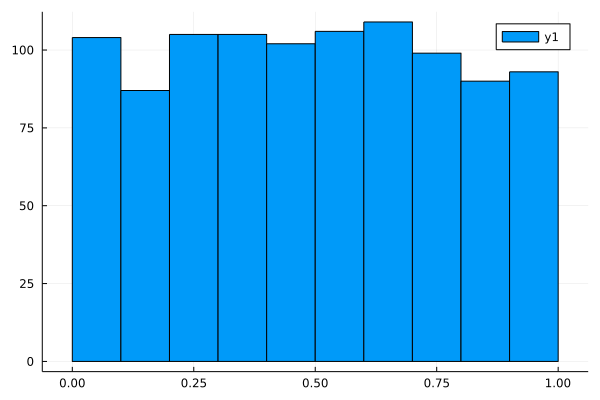

In [38]:
println(Statistics.mean(Sample_array))
println(Statistics.mean(Count))
histogram(Sample_array)

## Sample uniformly from a p-dimensional sphere (a circle is p=2). Consider a p-vector x = (x1, x2, ... , xp) and let  .  denote the Euclidean norm. The pdf of this distribution is:
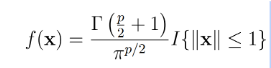
Use a uniform p-dimensional hypercube to sample uniformly from this sphere. Implement this for p = 2, 3, 4, 5, and 6. 
What happens as p increases?


### For p= odd , Use this fromula  to calculate the Gamma Function;
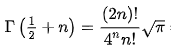
### For p= even , Use this fromula  to calculate the Gamma Function;


In [6]:
function calculate_fx(p)
    p = Int64(p)
    if(p%2==0)
        return factorial(Int64(p/2))/pi^(p/2)
    else
        n = (p+1)/2
        n = Int64(n)
        return (factorial(Int64(2*n))*pi^0.5)/(((4^n)*factorial(n))*pi^(p/2))
    end
end    

calculate_fx (generic function with 1 method)

In [7]:
function RV_Generator(p)

  
    accept =0
    count = 0
    array_p_dim = []
    
    while(accept==0)
        
        count = count +1
#         array_p_dim = []
        sum = 0.0
        for i in 1:p
            U = rand()
            U = 2*U -1 # Sampling from (-1,1)
            push!(array_p_dim,U)
            sum = sum + U^2   
        end
        if (sum <1.0)
            accept =1
            return array_p_dim,count
        else 
            empty!(array_p_dim)    

            
        end        
    end
end    
        

RV_Generator (generic function with 1 method)

### For p=2

In [8]:
Samples =1000
p =2
Matrix = zeros(Samples,p)
Array = []

Count_Array =[]
for i in 1:Samples
        Matrix[i,:],count= RV_Generator(p)
        push!(Count_Array,count)

    
end   
println(Matrix)

[0.25846053382681444 0.2924241290259497; 0.42085786792113233 -0.4587143541642078; 0.5643610407594424 0.09165993672086459; 0.8208201634132721 -0.5707281463283151; 0.24693302419872043 -0.7938015759383281; -0.056313417156687695 -0.540485700431153; 0.006384979669898705 0.82647847252979; 0.24832375314586796 -0.967315104821131; -0.16575967945294323 -0.9217171579917316; 0.06244297387666742 0.8170135620299999; -0.7374818717589844 0.6296479745393784; 0.6387382314467565 0.3168435355668078; -0.3949304403782965 -0.856451088677499; -0.38346606504080705 -0.6942803960561907; -0.438315813499746 0.6827045071019948; -0.44612779127467195 -0.4903904721734551; -0.32189392774263403 -0.5394674104003467; -0.40488054139631324 0.7812141157336616; -0.6000421551965582 0.013586788651348325; -0.7437678358270852 0.5610911630460031; -0.3646389134878274 -0.6731268944745161; 0.539029455981648 -0.20889916594203117; -0.4486450419370005 -0.7138428586326868; 0.5665556931198203 0.7371885633924624; 0.47206382257398527 0.7476

In [9]:
## Comparing the Average Count..........
g=1/2^p
f = calculate_fx(p)

ratio = f/g
println(ratio)
println(Statistics.mean(Count_Array))

1.2732395447351628
1.31


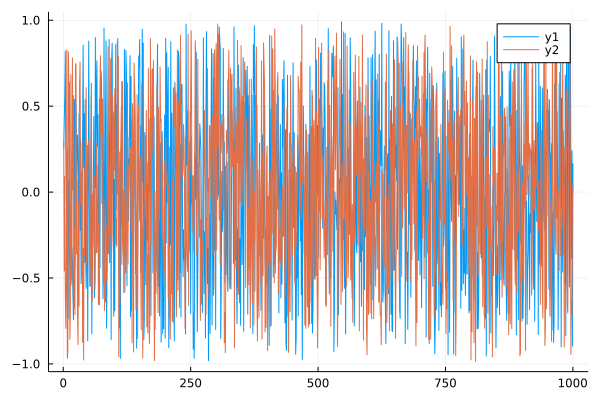

In [10]:
plot(Matrix)

### For p =3

In [11]:
Samples =1000
p  =3
Matrix = zeros(Samples,p)
Array = []

Count_Array =[]
for i in 1:Samples
        Matrix[i,:],count= RV_Generator(p)
        push!(Count_Array,count)

    
end   
println(Matrix)

[-0.4297533599988246 0.053612109668102814 0.013417959814228109; 0.5285893324732882 -0.028752479000124787 -0.6474031552845703; 0.056576561319059415 0.24367951190239245 0.9338338510142146; -0.042836950671102825 -0.567325045789965 0.5827262620546412; -0.21324892879808344 -0.7381651352398964 -0.23786267624788326; -0.21030983092153765 -0.37110492630063874 0.279321128625043; -0.126393870986502 -0.47709800553032555 0.38539298568467384; 0.506591477039148 0.7324774619239451 -0.06983801924312516; -0.15945456450694295 0.6963986535459317 -0.5176352759850003; -0.5916116011951833 0.004980367509017203 -0.4508349588791767; -0.3529305516962251 0.9136294017322086 -0.03053945382147627; 0.4824640555518871 -0.29818864567558556 -0.1590264325656927; -0.5021492324474022 0.3465767099889214 0.2959671279745755; 0.4125312675502484 -0.0744455579676595 0.8133331102029662; -0.7193384309313089 0.04962204209529264 0.16047415700482448; 0.4932647165891866 0.326781643049459 -0.15904413396676897; 0.5984995911629163 -0.444

1.909859317102744
1.938


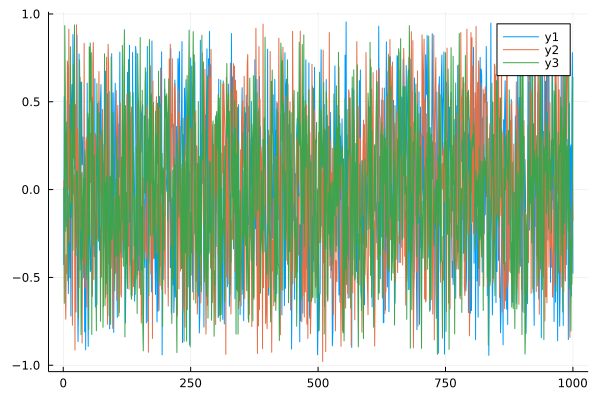

In [12]:
## Comparing the Average Count..........
g=1/2^p
f = calculate_fx(p)

ratio = f/g
println(ratio)
println(Statistics.mean(Count_Array))
plot(Matrix)

### For p =4

In [13]:
Samples =1000
p =4
Matrix = zeros(Samples,p)
Array = []

Count_Array =[]
for i in 1:Samples
        Matrix[i,:],count= RV_Generator(p)
        push!(Count_Array,count)

    
end   
println(Matrix)

[0.11523107402455612 -0.7493019684597011 -0.19998563742023445 -0.5065195114851435; -0.3849463332645744 0.048375124981252515 -0.08435610929832538 0.691133013278624; -0.4303192175041717 -0.6724956228652597 0.2664236657639052 0.23428321778291505; 0.06336140929603284 -0.3765429553581423 0.619137987154571 0.5524267612085367; 0.5386991402293366 -0.2741566293772386 -0.47980594540258603 -0.12291302687474936; -0.18827663053431998 -0.2552780497842171 -0.3430616797184223 0.7263562928521856; -0.46624997346429287 0.46032796787434216 -0.5162539937151043 -0.1477051309850177; -0.3451844686819858 0.3413891467477903 -0.589239443686818 -0.3962044020199187; 0.2096465664315188 -0.268871768231848 0.5899291106324489 -0.25302956929428455; -0.07414947021104257 -0.2041686849461002 -0.03686060891847487 0.36312620477861324; 0.1932798976916681 -0.029852366702137312 0.12309260581222259 0.8867684405721847; -0.4319176995448295 0.663800951505988 -0.14714016272244512 0.23330658679215954; 0.011955415409307557 0.30459330

3.242277876554809
3.22


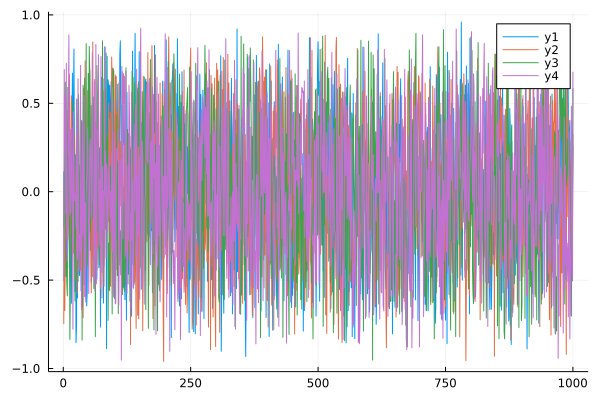

In [14]:
## Comparing the Average Count..........
g=1/2^p
f = calculate_fx(p)

ratio = f/g
println(ratio)
println(Statistics.mean(Count_Array))
plot(Matrix)

### For p=5

In [15]:
Samples =1000
p = 5
Matrix = zeros(Samples,p)
Array = []

Count_Array =[]
for i in 1:Samples
        Matrix[i,:],count= RV_Generator(p)
        push!(Count_Array,count)

    
end   
println(Matrix)

[-0.11553194731641403 -0.013861458753835043 0.10718734411306818 0.8230412057517953 -0.3401607444952177; 0.2724950003453217 0.0011746799745901981 -0.1733763209120005 0.4131108097107665 -0.6804881039137554; -0.22551543315591527 -0.7619889794318289 -0.1918758183869087 -0.0695802698741057 0.04526201038261246; 0.37890976246040475 0.06809269130896145 -0.5176621954588525 -0.07809524877251572 -0.5795037168158936; -0.2717700693607008 -0.14295721658254656 -0.337943205423739 -0.4133791443205257 0.3324396416062241; -0.7190604640184592 0.3051956312841908 -0.16552320857957326 -0.5088818497733212 0.3176500553108603; 0.627181544471088 0.4634547839494254 -0.5081919807776674 0.1806283473293262 0.08621340807801525; -0.5804137604521553 -0.11805872365696124 -0.6384734901954046 0.3189418769330865 -0.06379247532303256; -0.07922998032632789 -0.15263697281292887 0.1877425257502423 -0.7368030623715138 0.08360740324024274; -0.049304332813356444 0.12817718741776218 0.19865907959724782 -0.8511373354119596 -0.23282

6.0792710185402665
6.066


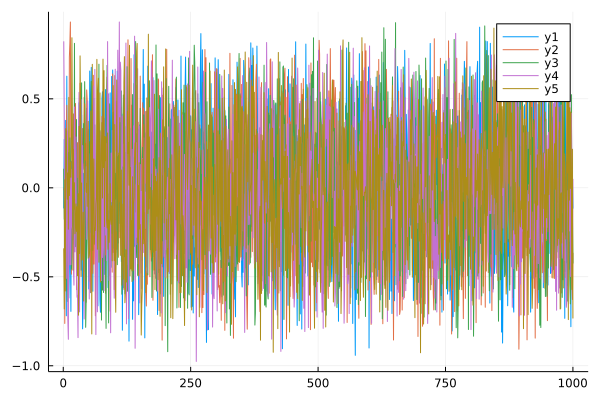

In [16]:
## Comparing the Average Count..........
g=1/2^p
f = calculate_fx(p)

ratio = f/g
println(ratio)
println(Statistics.mean(Count_Array))
plot(Matrix)

### For p = 6

In [17]:
Samples =1000
p  =6
Matrix = zeros(Samples,p)
Array = []

Count_Array =[]
for i in 1:Samples
        Matrix[i,:],count= RV_Generator(p)
        push!(Count_Array,count)

    
end   
println(Matrix)

[-0.08556039443233998 -0.17684288454983377 0.4349463793890267 -0.7616808124705312 0.06132301772114723 -0.2890033390529587; 0.1491594711314268 -0.34504871892830513 -0.6313701233740618 0.23372606373259064 -0.32984727280579573 -0.5184198264262516; -0.2038712916163652 -0.7714019006502288 0.35171228961838663 0.3231627704658071 0.15735476148184047 -0.23983671059203093; 0.007939731910410863 -0.42927234985888063 -0.027132454502020842 0.29276275601226454 -0.798106827453543 -0.14070566646519578; -0.15045752317524985 -0.5871082230624503 0.30939104952814334 -0.18146081015897653 -0.29085124865845713 0.09305542656721211; -0.6521975607070796 -0.045185761045470674 -0.3084875317500384 -0.09125215525979757 -0.35352835263784277 0.2106552997110327; -0.24769875475230152 0.3525334944956071 -0.122032765226745 -0.2160075087150477 0.01716198137915592 -0.3862029359373338; 0.3376601077645067 0.5416825916708046 0.29504294570283074 -0.14282578422749737 -0.2643259855865432 0.35381028747471355; 0.0368387657127307 -0

12.384589222348605
11.816


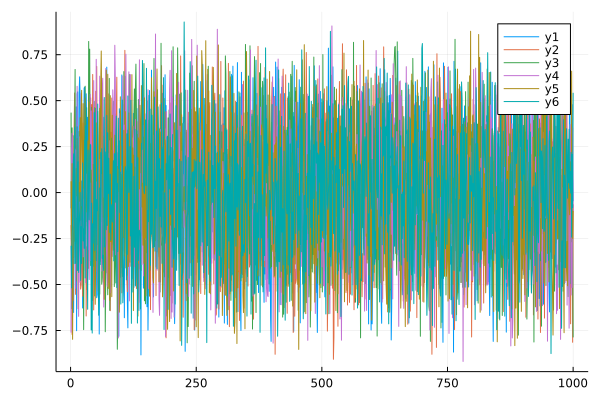

In [18]:
## Comparing the Average Count..........
g=1/2^p
f = calculate_fx(p)

ratio = f/g
println(ratio)
println(Statistics.mean(Count_Array))
plot(Matrix)

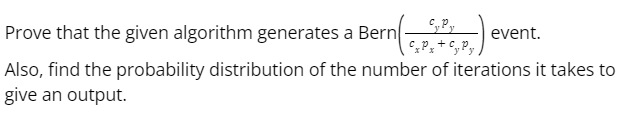
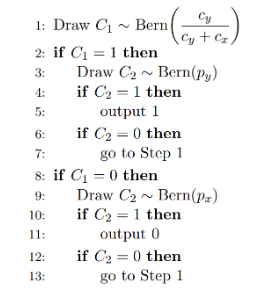

### Let X is the Random Variable generated from above algorithm.
**Clearly, X can take either 0 or 1 value.

P(X=1) = P(C1=1,C2=1) = P(C1=1) P(C2=1|C1=1)= $$\frac{Cy}{Cy+Cx}Py$$
Now , P(X=0) = P(C1=0,C2=1) = P(C1=0) P(C2=1|C1=0)= $$\frac{Cx}{Cy+Cx}Px$$**

### Now,we know it is the geometric distribution which tells the number of failure before getting a  success, so to calculate this probability distribution , lets first evaluate the probabiltity of acceptance

P(acceptance)  =  P(C1=1)P(C2=1) + P(C1=0)P(C2=1)     (By the law of total Probability)
=  $$\frac{CyPy}{Cy+Cx} +  \frac{CxPx}{Cy+Cx}$$ 

#### ProbabilityDistribution = Geometric( $$\frac{CyPy}{Cy+Cx} +  \frac{CxPx}{Cy+Cx}$$ )
